In [ ]:
# We need to import these modules to get started
drive_path = 'e:/'
import numpy as np
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
%matplotlib inline
from allensdk.core.brain_observatory_cache import BrainObservatoryCache
manifest_path = os.path.join(drive_path,'BrainObservatory/manifest.json')
boc = BrainObservatoryCache(manifest_file=manifest_path)
experiment_container_v1 = boc.get_experiment_containers(targeted_structures=['VISp'])
print(len(experiment_container_v1))
experiment_container_pm = boc.get_experiment_containers(targeted_structures=['VISpm'])
print(len(experiment_container_pm))
experiment_container_l = boc.get_experiment_containers(targeted_structures=['VISl'])
print(len(experiment_container_l))
experiment_container_al = boc.get_experiment_containers(targeted_structures=['VISal'])
print(len(experiment_container_al))
experiment_container_v1_cux2 = boc.get_experiment_containers(targeted_structures=['VISp'],cre_lines=['Cux2-CreERT2']);

# choose an animal
animal_number=0;
experiment_container_id = experiment_container_v1_cux2[animal_number]['id'];
experiment_information = boc.get_ophys_experiments(experiment_container_ids=[experiment_container_id]);

#schoose a session ession B    
session_id = experiment_information[2]['id']
data_set = boc.get_ophys_experiment_data(ophys_experiment_id= session_id)

25
21
16
17


In [3]:
#Call DG
#sg.stim_table;
from allensdk.brain_observatory.drifting_gratings import DriftingGratings
dg = DriftingGratings(data_set=data_set)

C:\Users\RezaEghbali\Anaconda2\lib\site-packages\allensdk\brain_observatory\stimulus_analysis.py:327: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  temp = self.celltraces[nc, start:end]
C:\Users\RezaEghbali\Anaconda2\lib\site-packages\allensdk\brain_observatory\stimulus_analysis.py:330: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  sweep_response['dx'][index] = self.dxcm[start:end]


3.39721


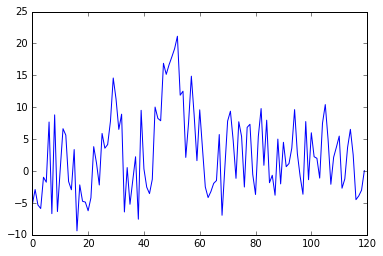

In [4]:
print(dg.sweep_response.iloc[0,0][0:60].mean())
%matplotlib inline
fig, ax  = plt.subplots();
ax.plot(dg.sweep_response.iloc[0,0])

In [5]:
dg.stim_table.keys

<bound method DataFrame.keys of      temporal_frequency  orientation  blank_sweep   start     end
0                   8.0        270.0          0.0     747     806
1                   2.0        135.0          0.0     837     897
2                   2.0        315.0          0.0     927     987
3                  15.0        315.0          0.0    1018    1077
4                   1.0        270.0          0.0    1108    1168
5                  15.0        315.0          0.0    1198    1258
6                   1.0        315.0          0.0    1289    1348
7                  15.0        180.0          0.0    1379    1439
8                   2.0        135.0          0.0    1469    1529
9                   0.0          0.0          1.0    1560    1619
10                  8.0          0.0          0.0    1650    1710
11                  2.0          0.0          0.0    1740    1800
12                  8.0        225.0          0.0    1831    1890
13                 15.0         45.0        

In [6]:
def labeled_data_extractor(stim_info, type_of_labels):
    '''Assignes lables for eah stimuli, Type_of_lable can be ['orientation'] or ['temporal_frequency'] or both. stim_info is a panda data_frame produces by BrainObservatoryCashe '''
    si = stim_info.copy();
    if len(type_of_labels) == 1:
        temp_si = si[type_of_labels[0]].replace(si[type_of_labels[0]].unique(), range(len(si[type_of_labels[0]].unique())));
        return(temp_si.values.astype(int))
    elif ['temporal_frequency', 'orientation'] in type_of_labels:
        0;

In [7]:
Y = labeled_data_extractor(dg.stim_table,['temporal_frequency']);
Y2 = Y.copy();
Y.shape = (len(Y),1);
Y

array([[0],
       [1],
       [1],
       [2],
       [3],
       [2],
       [3],
       [2],
       [1],
       [4],
       [0],
       [1],
       [0],
       [2],
       [5],
       [0],
       [5],
       [0],
       [2],
       [3],
       [2],
       [3],
       [2],
       [4],
       [3],
       [0],
       [3],
       [5],
       [2],
       [5],
       [0],
       [1],
       [5],
       [5],
       [0],
       [1],
       [2],
       [0],
       [2],
       [5],
       [5],
       [2],
       [2],
       [0],
       [1],
       [1],
       [0],
       [5],
       [3],
       [3],
       [2],
       [3],
       [1],
       [3],
       [1],
       [0],
       [0],
       [2],
       [1],
       [2],
       [1],
       [1],
       [0],
       [2],
       [3],
       [3],
       [2],
       [5],
       [0],
       [3],
       [1],
       [5],
       [3],
       [3],
       [3],
       [2],
       [0],
       [1],
       [3],
       [5],
       [5],
       [5],
       [3],
    

In [14]:
X = dg.mean_sweep_response.values
X.shape
Y_original = Y2.copy();
X_original = X.copy();
X = X_original[0:10,0:10];
Y = Y_original[0:10];

In [15]:
X.shape
Y.shape

(10,)

In [16]:
#def multi_class_svm(X,Y):
from cvxpy import *
n = X.shape[1];
s = X.shape[0];
m = np.max(Y) + 1;
YM = np.eye(m, m);
YM = YM[Y];
YM = YM.T;
beta = Variable(n,m)
v = Variable(1, m)
print YM.shape
print Y.shape
print X.shape


loss = sum_entries(pos(1 + max_entries((X*beta) + np.ones((s, 1)) * v, axis=1) )- diag((X * beta + np.ones((s, 1)) * v) * YM))
reg = norm(beta, 1)
lambd = 1.
#Parameter(sign="positive")
prob = Problem(Minimize(loss / m + lambd * reg))
#lambd.value=1.0;
prob.solve()
#    return prob;

(5, 10)
(10,)
(10, 10)


1.999999999879688

In [18]:
X

array([[  4.41843843,  -0.0385377 ,   0.55557984,   0.72103661,
         -1.1159035 ,   1.99028671,   4.10824442,   7.54141998,
         -0.19889444,   2.03053355],
       [ -2.32436323,   2.29957247,   5.0228281 ,   0.35627916,
         -0.456909  ,   1.21776593,   3.47771621,   2.25340748,
          3.48082042,   0.63330191],
       [  0.85486913,  -3.42272544,  -1.65800679,  -5.17419958,
         -1.78511941,  -0.92375058,  -2.01958394,   0.47018006,
         -1.30533659,   1.7190305 ],
       [ -0.52951705,   1.14612663,  -1.88725901,  -0.68383437,
         -0.99556911,   0.21510153,   1.60482037,   0.52375352,
          0.95247006,  -1.9119885 ],
       [  0.44136161,   1.65955007,   7.3932848 ,   4.91285753,
          4.96441555,   5.43684673,  12.56943893,   2.33798289,
          1.44295704,   3.07865   ],
       [ -0.51684248,  -0.3043094 ,  -4.19462824,  -2.97118807,
         -0.80163479,   0.46381471,  -4.24665689,  -4.89105749,
          0.51340783,   2.56211972],
       [  

AttributeError: 'int' object has no attribute 'value'